In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Offenses_Known_to_Law_Enforcement_by_State_by_City_2013.csv', header=None)
# Remove the first 3 rows
df = df[3:]
df = df.rename(columns=df.iloc[0])
df = df[1:]
df['State']
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,nan,nan
4,ALABAMA,Abbeville,2645,11,1,1,NaN,2,7,63,21,39,3,NaN,NaN,NaN,NaN
5,NaN,Adamsville,4481,19,1,0,NaN,7,11,321,58,252,11,NaN,NaN,NaN,
6,NaN,Addison,744,1,0,1,NaN,0,0,25,6,17,2,NaN,NaN,NaN,
7,NaN,Alabaster,31170,44,0,2,NaN,11,31,640,70,544,26,NaN,NaN,NaN,NaN
8,NaN,Alexander City,14692,119,2,16,NaN,12,89,661,121,510,30,NaN,NaN,NaN,NaN


In [3]:
true_states = []
# Clean the NaN results in the column 'State' 
def fixNanStates(states):
    # For each state
    for state in states:
        # If variable is equal to variable, is used to define NaN, in this case, if it is True, It won't be NaN
        if state == state:
            real_state = state
            true_states.append(str(state))
        # If variable is  not equal to variable, is used to define NaN, in this case, if it is True, It will be NaN
        elif state != state:
            state = real_state
            true_states.append(str(state))
            
# Turn data objects into categories, this way the ammount of space used is much less
def objToCat(dataframe, columns):
    for col in columns:
        dataframe[col] = dataframe[col].astype('category')

# Turn data objects into floats
def objToFloat(dataframe):
    columns = dataframe.columns.values
    for col in columns:
        dataframe[col] = dataframe[col].astype('float')
        
def spread(series):
    return series.max() - series.min()

In [4]:
states = df['State']
fixNanStates(states)            
df['State'] = true_states


In [5]:
df.columns = df.columns.str.replace('\n',' ')
df = df.loc[:, 'State': 'Motor vehicle theft']

In [6]:
df.head(2)

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
4,ALABAMA,Abbeville,2645,11,1,1,NaN,2,7,63,21,39,3
5,ALABAMA,Adamsville,4481,19,1,0,NaN,7,11,321,58,252,11


In [7]:
df.describe()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
count,9302,9292,9289,9288,9292,5431,3859,9292,9289,9288,9290,9290,9292
unique,60,7142,7420,629,76,127,107,348,496,1818,819,1557,497
top,PENNSYLVANIA,Clinton,2269,0,0,0,0,0,0,0,0,0,0
freq,853,15,5,1057,7536,2270,1733,3832,1430,192,494,273,1798


In [8]:
usacrime_df = df.loc[: , 'State': 'Motor vehicle theft']
objToCat(usacrime_df, ['State', 'City'])
print(usacrime_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 4 to 9305
Data columns (total 13 columns):
State                                   9302 non-null category
City                                    9292 non-null category
Population                              9289 non-null object
Violent crime                           9288 non-null object
Murder and nonnegligent manslaughter    9292 non-null object
Rape (revised definition)1              5431 non-null object
Rape (legacy definition)2               3859 non-null object
Robbery                                 9292 non-null object
Aggravated assault                      9289 non-null object
Property crime                          9288 non-null object
Burglary                                9290 non-null object
Larceny- theft                          9290 non-null object
Motor vehicle theft                     9292 non-null object
dtypes: category(2), object(11)
memory usage: 1.2+ MB
None


In [9]:
usacrime_df = usacrime_df.set_index(['State', 'City'])
usacrime_df.head()

Population Violent crime  \
State   City                                      
ALABAMA Abbeville            2645            11   
        Adamsville           4481            19   
        Addison               744             1   
        Alabaster           31170            44   
        Alexander City      14692           119   

                       Murder and nonnegligent manslaughter  \
State   City                                                  
ALABAMA Abbeville                                         1   
        Adamsville                                        1   
        Addison                                           0   
        Alabaster                                         0   
        Alexander City                                    2   

                       Rape (revised definition)1 Rape (legacy definition)2  \
State   City                                                                  
ALABAMA Abbeville                               1                       NaN   
        Adamsville                              0                       NaN   
        Addison                                 1                       NaN   
        Alabaster                               2                       NaN   
        Alexander City                         16                       NaN   

                       Robbery Aggravated assault Property crime Burglary  \
State   City                                                                
ALABAMA Abbeville            2                  7             63       21   
        Adamsville           7                 11            321       58   
        Addison              0                  0             25        6   
        Alabaster           11                 31            640       70   
        Alexander City      12                 89            661      121   

                       Larceny- theft Motor vehicle theft  
State   City                                               
ALABAMA Abbeville                  39                   3  
        Adamsville                252                  11  
        Addison                    17                   2  
        Alabaster                 544                  26  
        Alexander City            510                  30

In [10]:
# Finding the columns the have NaN values
usacrime_df.loc[:, usacrime_df.isnull().any()].head()

Population Violent crime  \
State   City                                      
ALABAMA Abbeville            2645            11   
        Adamsville           4481            19   
        Addison               744             1   
        Alabaster           31170            44   
        Alexander City      14692           119   

                       Murder and nonnegligent manslaughter  \
State   City                                                  
ALABAMA Abbeville                                         1   
        Adamsville                                        1   
        Addison                                           0   
        Alabaster                                         0   
        Alexander City                                    2   

                       Rape (revised definition)1 Rape (legacy definition)2  \
State   City                                                                  
ALABAMA Abbeville                               1                       NaN   
        Adamsville                              0                       NaN   
        Addison                                 1                       NaN   
        Alabaster                               2                       NaN   
        Alexander City                         16                       NaN   

                       Robbery Aggravated assault Property crime Burglary  \
State   City                                                                
ALABAMA Abbeville            2                  7             63       21   
        Adamsville           7                 11            321       58   
        Addison              0                  0             25        6   
        Alabaster           11                 31            640       70   
        Alexander City      12                 89            661      121   

                       Larceny- theft Motor vehicle theft  
State   City                                               
ALABAMA Abbeville                  39                   3  
        Adamsville                252                  11  
        Addison                    17                   2  
        Alabaster                 544                  26  
        Alexander City            510                  30

In [11]:
# All of them have some NaN values so time to clean it

# First of, if a 'Rape (revised definition)1' happens then a 'Rape (legacy definition)2' doesn't happen and vice-versa therefore,
# we are getting NaN values when it doesn't happen, so let's just change it to 0 instead of NaN
usacrime_df[['Rape (revised definition)1', 'Rape (legacy definition)2']] = (usacrime_df[['Rape (revised definition)1', 
                                                                                       'Rape (legacy definition)2']].fillna(0))

# Now we delete every row with 4 or more NaN values
usacrime_df = usacrime_df.dropna(thresh=4, axis='rows')

In [12]:
# Way cleaner now as we can see below, still some NaN values still linger
usacrime_df[usacrime_df.isnull().any(axis=1)]

Population Violent crime  \
State    City                                              
ALABAMA  Tallassee5                   4830           NaN   
FLORIDA  Dunnellon7                   1750             9   
ILLINOIS Chicago7, 8               2720554           NaN   
INDIANA  Sellersburg5                 6150           NaN   
         Shelbyville5                19159           NaN   
MARYLAND Baltimore City Sheriff        NaN             0   
OHIO     Toledo10                   283035          2902   
OREGON   Black Butte                   NaN             0   
         Sunriver                      NaN             2   
UTAH     Bountiful5                  42976            61   
         Hurricane5                  14558            14   

                                Murder and nonnegligent manslaughter  \
State    City                                                          
ALABAMA  Tallassee5                                                0   
FLORIDA  Dunnellon7                                                0   
ILLINOIS Chicago7, 8                                             414   
INDIANA  Sellersburg5                                              0   
         Shelbyville5                                              0   
MARYLAND Baltimore City Sheriff                                    0   
OHIO     Toledo10                                                 28   
OREGON   Black Butte                                               0   
         Sunriver                                                  0   
UTAH     Bountiful5                                                0   
         Hurricane5                                                0   

                                Rape (revised definition)1  \
State    City                                                
ALABAMA  Tallassee5                                      0   
FLORIDA  Dunnellon7                                      0   
ILLINOIS Chicago7, 8                                     0   
INDIANA  Sellersburg5                                    0   
         Shelbyville5                                    0   
MARYLAND Baltimore City Sheriff                          0   
OHIO     Toledo10                                      129   
OREGON   Black Butte                                     0   
         Sunriver                                        0   
UTAH     Bountiful5                                     23   
         Hurricane5                                      3   

                                Rape (legacy definition)2 Robbery  \
State    City                                                       
ALABAMA  Tallassee5                                     0       1   
FLORIDA  Dunnellon7                                     0       0   
ILLINOIS Chicago7, 8                                    0   11815   
INDIANA  Sellersburg5                                   0       3   
         Shelbyville5                                   4       3   
MARYLAND Baltimore City Sheriff                         0       0   
OHIO     Toledo10                                       0     962   
OREGON   Black Butte                                    0       0   
         Sunriver                                       0       0   
UTAH     Bountiful5                                     0      14   
         Hurricane5                                     0       2   

                                Aggravated assault Property crime Burglary  \
State    City                                                                
ALABAMA  Tallassee5                             66            296       86   
FLORIDA  Dunnellon7                              9            NaN       13   
ILLINOIS Chicago7, 8                           NaN          95908    17775   
INDIANA  Sellersburg5                          NaN            109       17   
         Shelbyville5                          NaN            448       55   
MARYLAND Baltimore City Sheriff                  0             

In [13]:
# As we see, columns with NaN Population values are not helpfull in the slightest since most of all the columns seem to be 0,
# when this case happens, let's remove the Population rows where Population is NaN and feel the rest with of the NaN values with
# 0 values, so that they don't affect much our dataset
usacrime_df = usacrime_df[pd.notnull(usacrime_df['Population'])]
usacrime_df = usacrime_df.fillna(0)

In [14]:
# And voilla!! A much cleaner dataset, although alot of work is still ahead of us! So buckle up!!
usacrime_df[usacrime_df.isnull().any(axis=1)]

,,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
State,City,,,,,,,,,,,


In [15]:
# Gonna set the Population as an Index as well, which will turn this dataframe into a multi-indexed daframe
usacrime_df = usacrime_df.set_index(['Population'], append=True)
usacrime_df.columns.name = 'Crimes'
usacrime_df = usacrime_df.sort_index()
usacrime_df.head(5)

Crimes                            Violent crime  \
State   City           Population                 
ALABAMA Abbeville      2645                  11   
        Adamsville     4481                  19   
        Addison        744                    1   
        Alabaster      31170                 44   
        Alexander City 14692                119   

Crimes                            Murder and nonnegligent manslaughter  \
State   City           Population                                        
ALABAMA Abbeville      2645                                          1   
        Adamsville     4481                                          1   
        Addison        744                                           0   
        Alabaster      31170                                         0   
        Alexander City 14692                                         2   

Crimes                            Rape (revised definition)1  \
State   City           Population                              
ALABAMA Abbeville      2645                                1   
        Adamsville     4481                                0   
        Addison        744                                 1   
        Alabaster      31170                               2   
        Alexander City 14692                              16   

Crimes                            Rape (legacy definition)2 Robbery  \
State   City           Population                                     
ALABAMA Abbeville      2645                               0       2   
        Adamsville     4481                               0       7   
        Addison        744                                0       0   
        Alabaster      31170                              0      11   
        Alexander City 14692                              0      12   

Crimes                            Aggravated assault Property crime Burglary  \
State   City           Population                                              
ALABAMA Abbeville      2645                        7             63       21   
        Adamsville     4481                       11            321       58   
        Addison        744                         0             25        6   
        Alabaster      31170                      31            640       70   
        Alexander City 14692                      89            661      121   

Crimes                            Larceny- theft Motor vehicle theft  
State   City           Population                                     
ALABAMA Abbeville      2645                   39                   3  
        Adamsville     4481                  252                  11  
        Addison        744                    17                   2  
        Alabaster      31170                 544                  26  
        Alexander City 14692                 510                  30

In [16]:
objToFloat(usacrime_df)

In [17]:
usacrime_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9289 entries, (ALABAMA, Abbeville, 2645) to (WYOMING, Worland, 5441)
Data columns (total 10 columns):
Violent crime                           9289 non-null float64
Murder and nonnegligent manslaughter    9289 non-null float64
Rape (revised definition)1              9289 non-null float64
Rape (legacy definition)2               9289 non-null float64
Robbery                                 9289 non-null float64
Aggravated assault                      9289 non-null float64
Property crime                          9289 non-null float64
Burglary                                9289 non-null float64
Larceny- theft                          9289 non-null float64
Motor vehicle theft                     9289 non-null float64
dtypes: float64(10)
memory usage: 1.2+ MB


In [18]:
# Grouping each crime by sum, mean, count, min, max by State
def plotterAgg(dataframe):
    columns = dataframe.columns.values
    for col in columns:
        aggregator = {col: ['sum', 'mean', 'count', 'min', 'max', spread]}
        usacrime = usacrime_df.groupby('State').agg(aggregator)
        usacrime.plot(kind='bar', figsize=(14, 12))

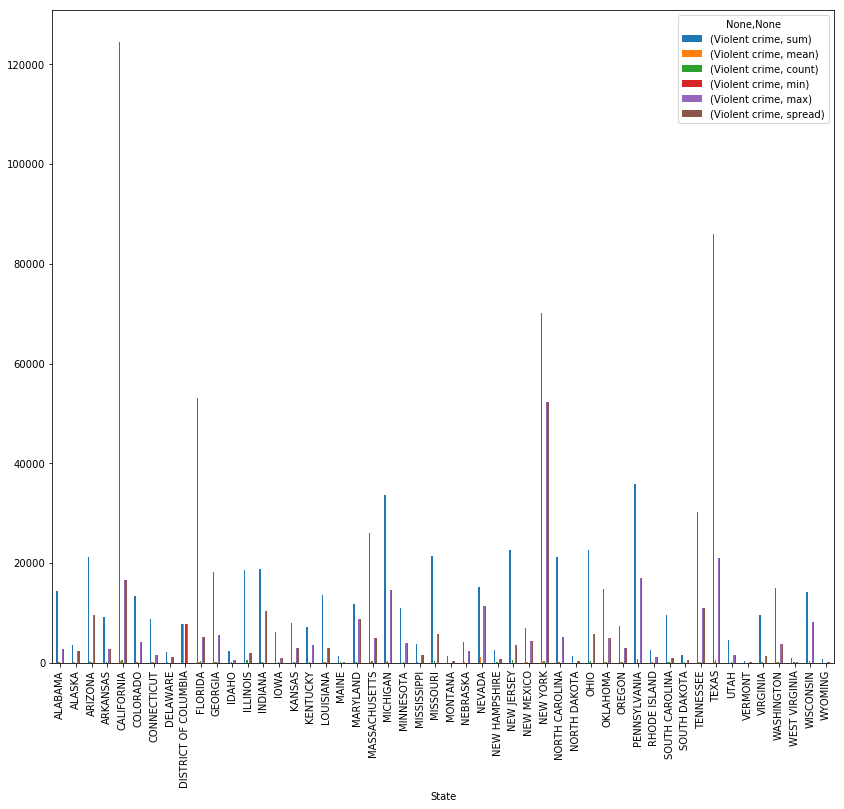

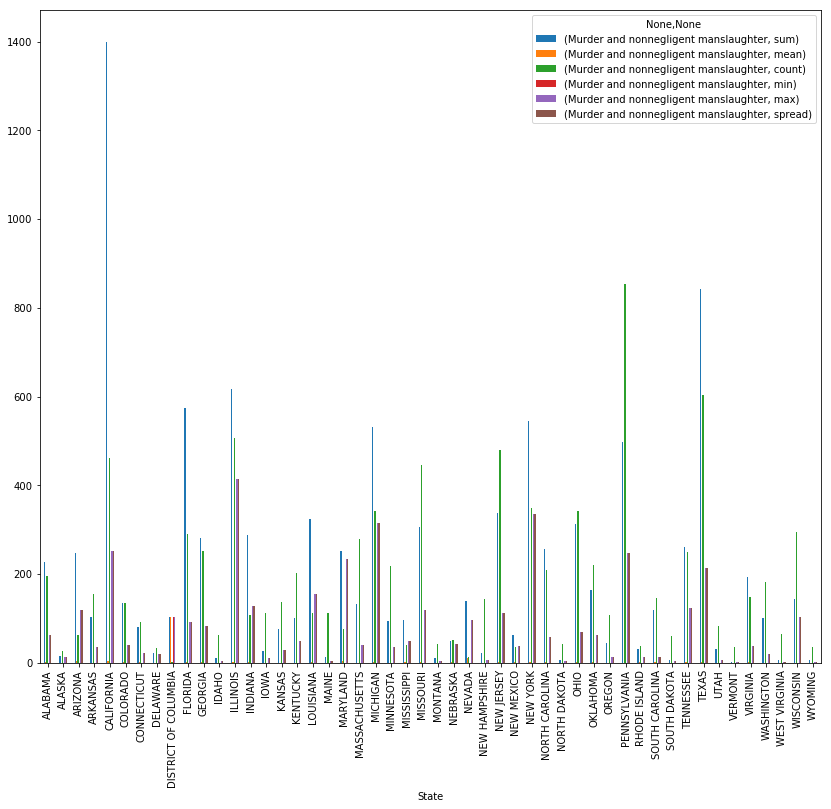

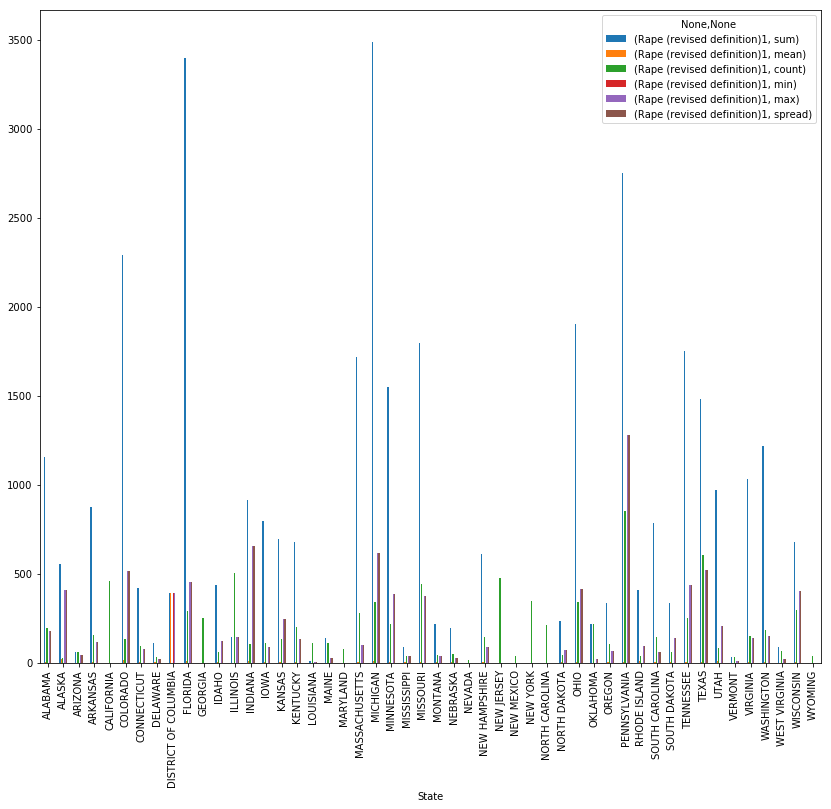

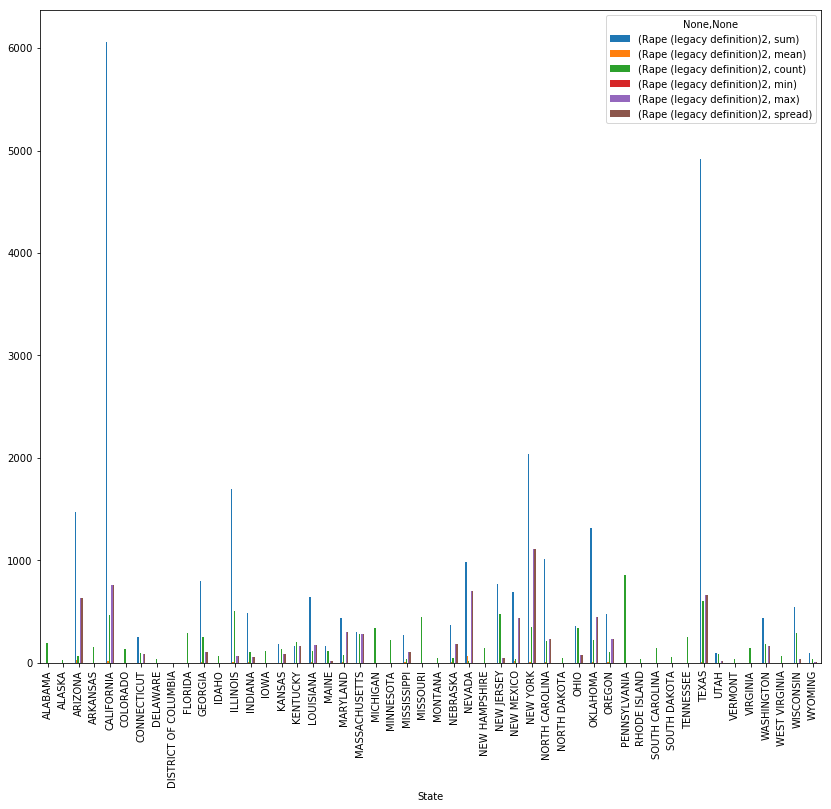

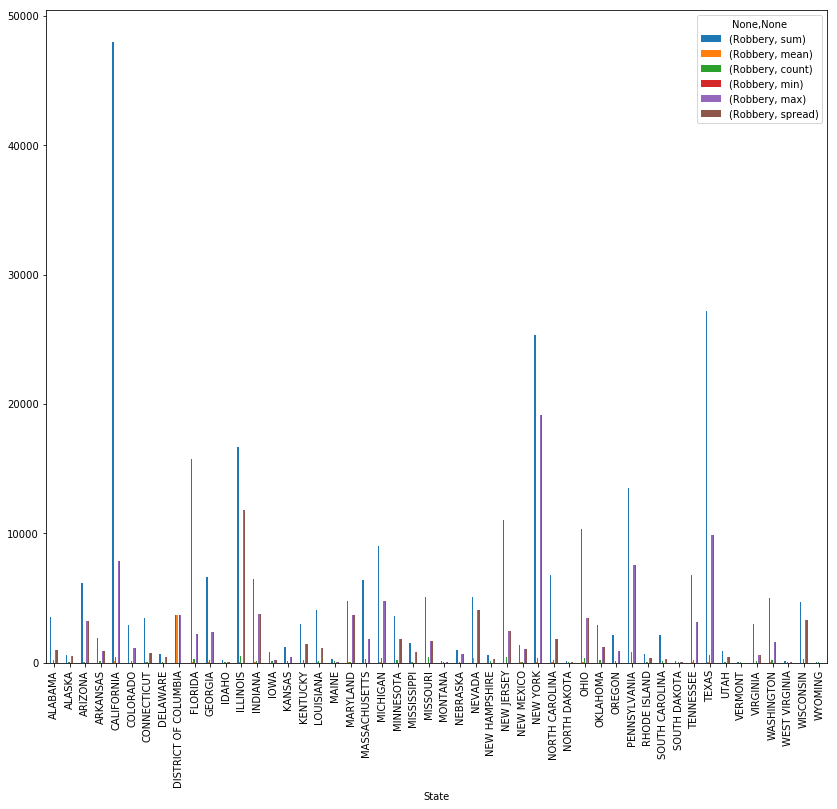

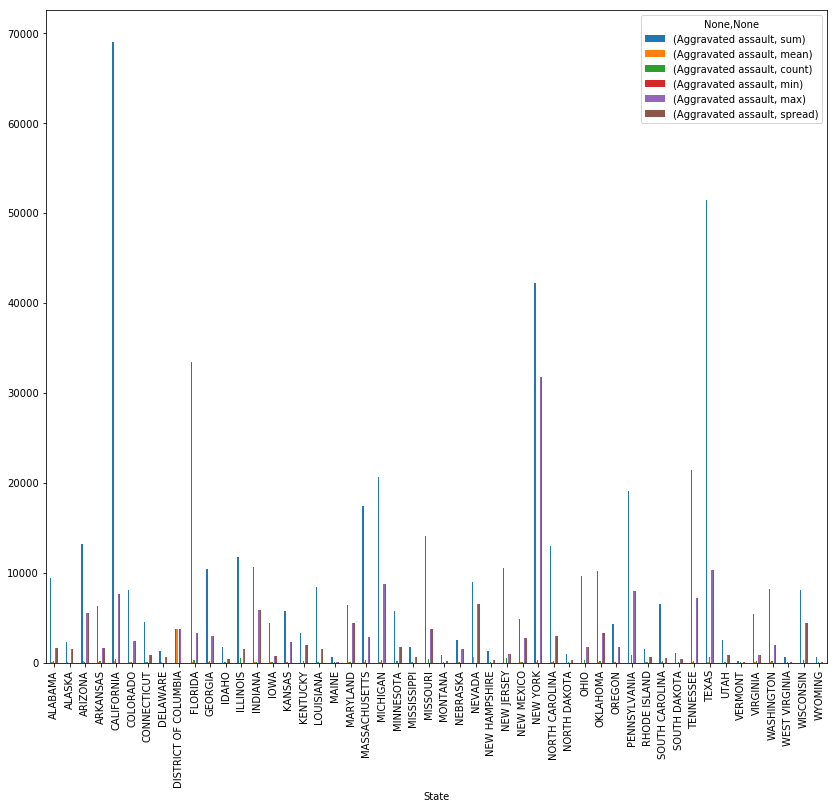

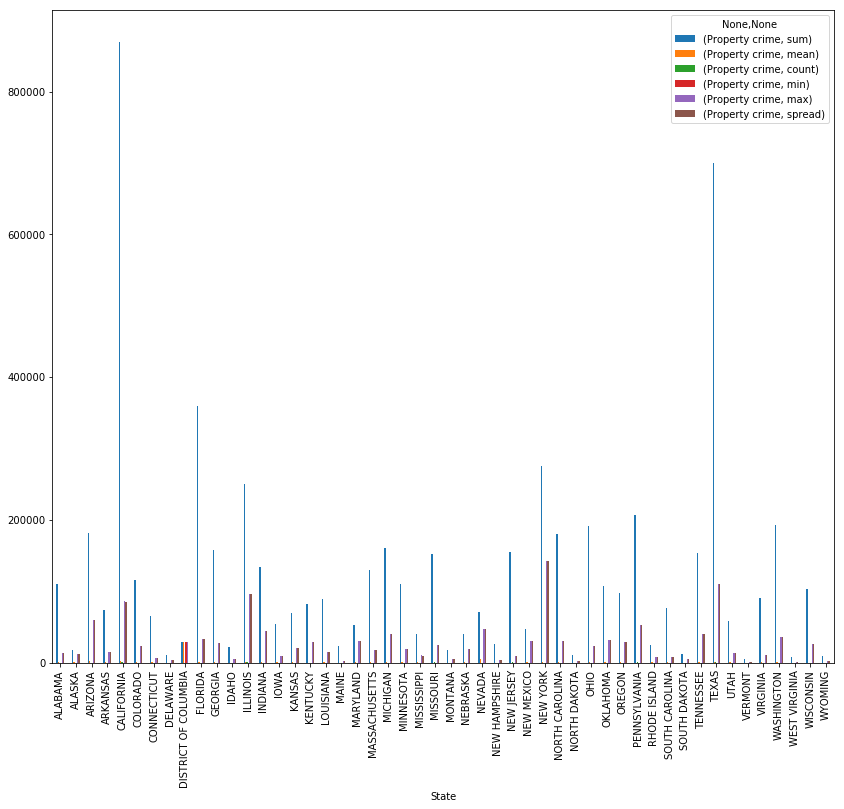

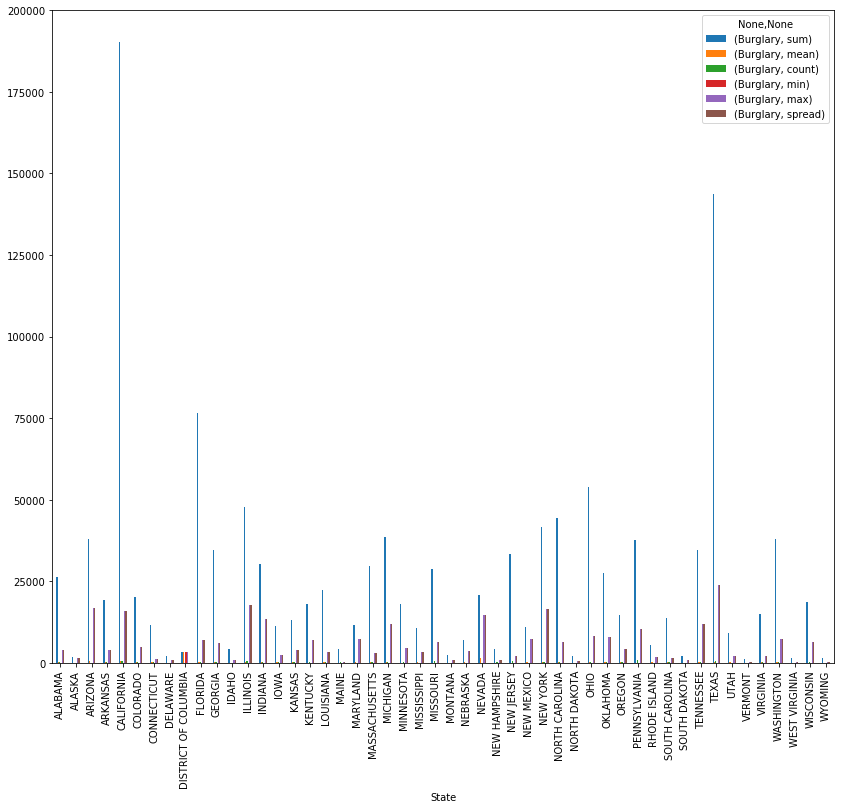

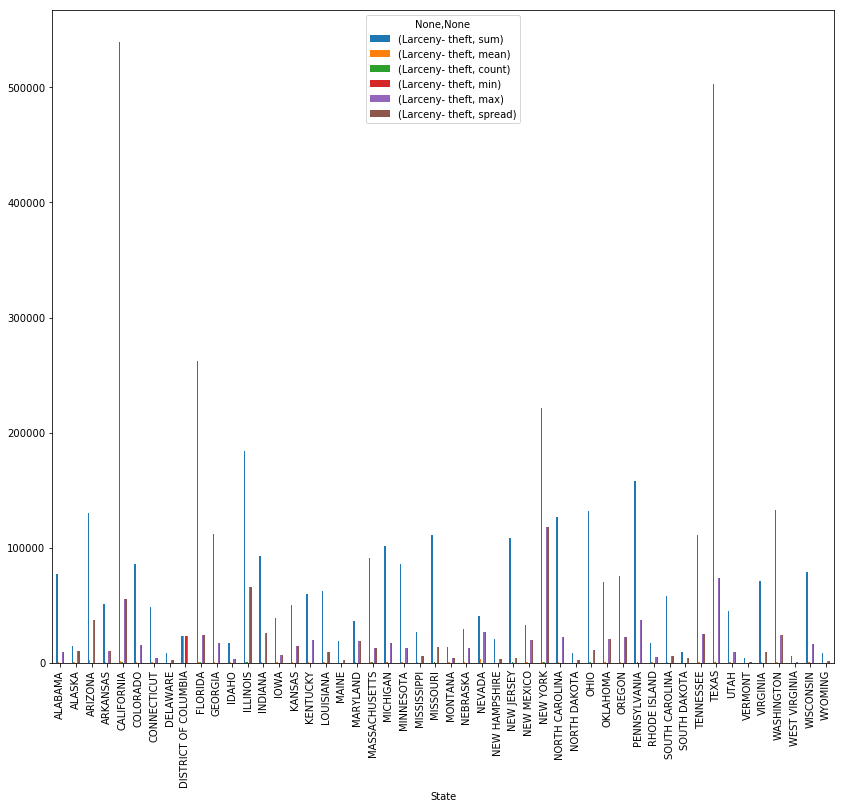

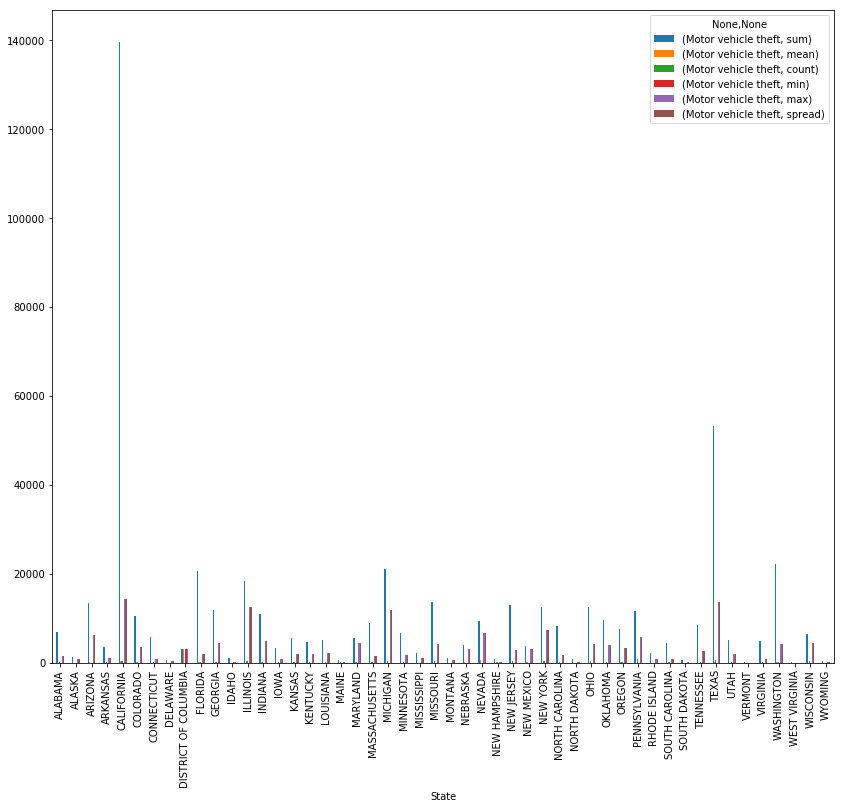

In [19]:
plotterAgg(usacrime_df)

In [20]:
usacrime_df_new = usacrime_df.reset_index()
usacrime_df_new['Population'] = usacrime_df_new['Population'].replace('.', '')

usacrime_df_new['Population'] = usacrime_df_new['Population'].astype('int')
usacrime_df_new.head()

Crimes,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA,Abbeville,2645,11.0,1.0,1.0,0.0,2.0,7.0,63.0,21.0,39.0,3.0
1,ALABAMA,Adamsville,4481,19.0,1.0,0.0,0.0,7.0,11.0,321.0,58.0,252.0,11.0
2,ALABAMA,Addison,744,1.0,0.0,1.0,0.0,0.0,0.0,25.0,6.0,17.0,2.0
3,ALABAMA,Alabaster,31170,44.0,0.0,2.0,0.0,11.0,31.0,640.0,70.0,544.0,26.0
4,ALABAMA,Alexander City,14692,119.0,2.0,16.0,0.0,12.0,89.0,661.0,121.0,510.0,30.0


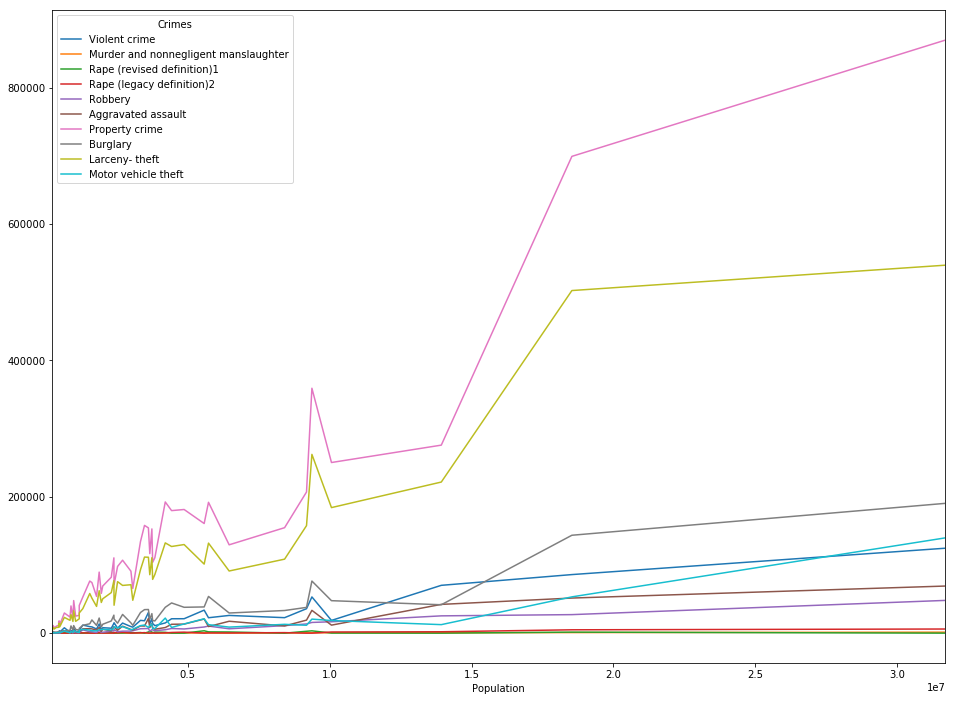

In [21]:
usacrime_df_grouped = usacrime_df_new.groupby('State').agg('sum')
usacrime_df_grouped = usacrime_df_grouped[10:].set_index('Population')
#usacrime_df_grouped.sort_values(by='Population', ascending=False)
usacrime_df_grouped = usacrime_df_grouped.sort_index()

# Property crime is the most predominant
usacrime_df_grouped.plot(figsize=(16, 12))

In [22]:
usacrime_df_grouped = usacrime_df_grouped.idxmax()
usacrime_df_grouped

Crimes
Violent crime                           31696400.0
Murder and nonnegligent manslaughter    31696400.0
Rape (revised definition)1               5574769.0
Rape (legacy definition)2               31696400.0
Robbery                                 31696400.0
Aggravated assault                      31696400.0
Property crime                          31696400.0
Burglary                                31696400.0
Larceny- theft                          31696400.0
Motor vehicle theft                     31696400.0
dtype: float64

In [51]:
usacrime_df_corr = usacrime_df['Violent crime']
usacrime_df_old = usacrime_df.drop('Violent crime', axis=1)
usacrime_df_old.corrwith(usacrime_df_corr)

Crimes
Murder and nonnegligent manslaughter    0.791656
Rape (revised definition)1              0.428822
Rape (legacy definition)2               0.757459
Robbery                                 0.910717
Aggravated assault                      0.991299
Property crime                          0.871259
Burglary                                0.797978
Larceny- theft                          0.880907
Motor vehicle theft                     0.742580
dtype: float64

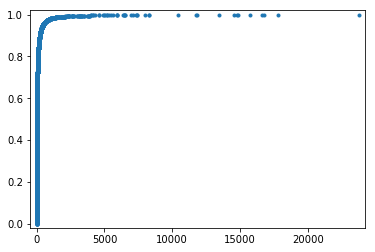

In [44]:
x = np.sort(usacrime_df_new['Burglary'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.show()